In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [3]:
#load MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
#explore dataset
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

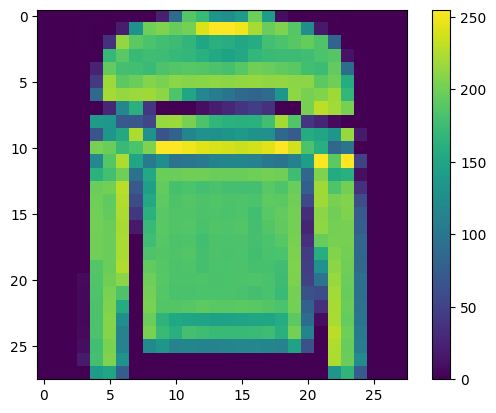

In [16]:
#preprocessing

plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
#scaling x_train, x_test
x_train= x_train/255.0
x_test= x_test/255.0

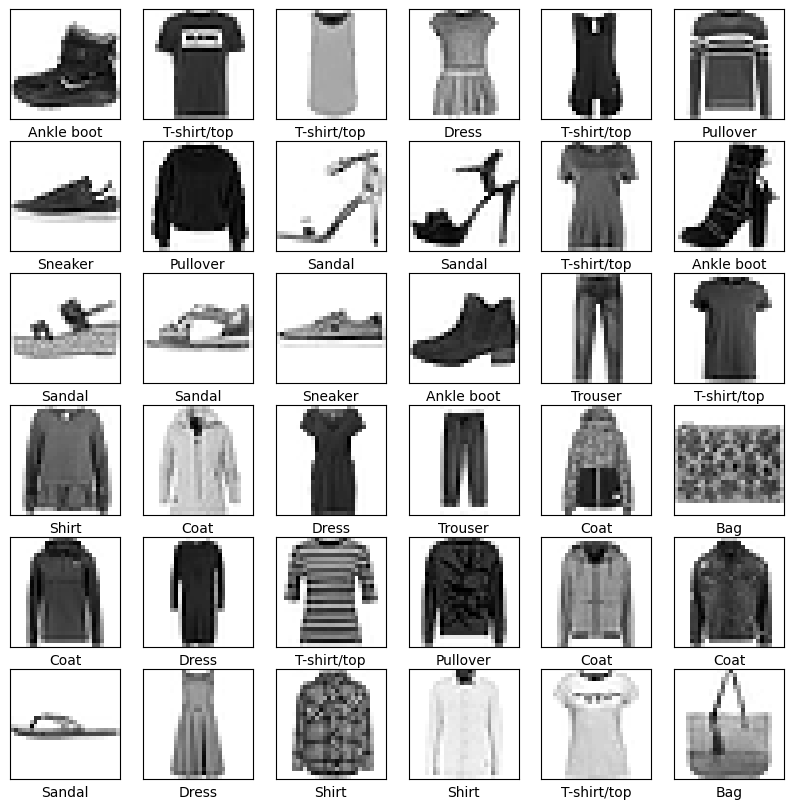

In [26]:
#figure Sample of data after scaling
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [28]:
# build model layer
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),  # transform format of data from 2-D array to 1-D array with depth of 28*28 pixel
    tf.keras.layers.Dense(128, activation='relu'), # fully connected layer use 128 neurons (nodes) and use relu
    tf.keras.layers.Dense(10) # output layer with 10 neurons for 10 classes of classifing
])

In [29]:
# compile the model b4 training to improve its accuracy and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
# train model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7809 - loss: 0.6293
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8602 - loss: 0.3892
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8757 - loss: 0.3444
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8814 - loss: 0.3201
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8917 - loss: 0.2925
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8957 - loss: 0.2815
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8988 - loss: 0.2742
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9062 - loss: 0.2550
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9111 - loss: 0.2452
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9112 - loss: 0.2377


In [33]:
# evaluate model
test_eval=model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.8818 - loss: 0.3389


In [36]:
# prediction
probability_model=tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions=probability_model.predict(x_test)
predictions[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([1.0134312e-05, 1.2943718e-06, 1.1134620e-07, 2.8065258e-10,
       2.7052809e-07, 4.8470419e-04, 2.4544352e-07, 5.0405987e-02,
       1.5251748e-06, 9.4909573e-01], dtype=float32)

In [37]:
# max class evaluated correctly
np.argmax(predictions[0])
y_test[0]

9